In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
from util_functions import *
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_data_inp = pd.read_csv('.\data\preprocessed_data.csv')

In [3]:
df_data_inp.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3592 entries, 0 to 3591
Data columns (total 160 columns):
Winner                                object
title_bout                            bool
no_of_rounds                          int64
B_current_lose_streak                 float64
B_current_win_streak                  float64
B_draw                                float64
B_avg_BODY_att                        float64
B_avg_BODY_landed                     float64
B_avg_CLINCH_att                      float64
B_avg_CLINCH_landed                   float64
B_avg_DISTANCE_att                    float64
B_avg_DISTANCE_landed                 float64
B_avg_GROUND_att                      float64
B_avg_GROUND_landed                   float64
B_avg_HEAD_att                        float64
B_avg_HEAD_landed                     float64
B_avg_KD                              float64
B_avg_LEG_att                         float64
B_avg_LEG_landed                      float64
B_avg_PASS              

In [4]:
df_data_inp = preprocess_col_names(df_data_inp)

## Generate data profile

In [5]:
# profile_data = ProfileReport(df_data_inp)

In [6]:
# profile_data.to_file('Profile_Input_Data.html')

## Visualize fighter attributes

In [7]:
# separate out fighter attributes by corner
b_corner_attributes = [x.replace('B_', '', 1) for x in df_data_inp.columns.values if 'B_' in x[:2]]
r_corner_attributes = [x.replace('R_', '', 1) for x in df_data_inp.columns.values if 'R_' in x[:2]]

# Explore missing attributes
# Print # of blue corner attributes and # of red corner fighter attributes
print(str(len(b_corner_attributes)) + '...' + str(len(r_corner_attributes)))
print('union set:' + str(len(set(b_corner_attributes)|set(r_corner_attributes))))
print('intersection set:' + str(len(set(b_corner_attributes)&set(r_corner_attributes))))

# extract features not present in both red and blue corner fighters
non_overlapping_features = list((set(b_corner_attributes)|set(r_corner_attributes)) - (set(b_corner_attributes)&set(r_corner_attributes)))
print(non_overlapping_features)

72...71
union set:72
intersection set:71
['Stance_Sideways']


`Stance_Sideways` is an additional attribute in fighters in the blue corner. This is probably because this is an uncommon fighting stance
We can fill with zeros for the red corner fighters for analysis

In [8]:
# extract blue and red fighter attributes
df_blue_fighter_attributes = df_data_inp.copy()[['B_'+x for x in b_corner_attributes]]
df_red_fighter_attributes = df_data_inp.copy()[['R_'+x for x in b_corner_attributes if x not in non_overlapping_features]]

for dfi in [df_blue_fighter_attributes, df_red_fighter_attributes]:
    dfi.columns = [x[2:]
                   for x in dfi.columns.values if 'B_' in x[:2] or 'R_' in x[:2]]

# fill missing features with zero
for feat in non_overlapping_features:
    df_red_fighter_attributes[feat] = 0

# append blue and red fighter attributes - with correct order of columns
df_fighter_attributes = pd.concat([df_blue_fighter_attributes,
                                   df_red_fighter_attributes[b_corner_attributes]])

In [9]:
df_fighter_attributes.shape

(7184, 72)

Looks like the correct # of columns and rows, we are good to go!

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7184 samples in 0.203s...
[t-SNE] Computed neighbors for 7184 samples in 1.590s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7184
[t-SNE] Computed conditional probabilities for sample 2000 / 7184
[t-SNE] Computed conditional probabilities for sample 3000 / 7184
[t-SNE] Computed conditional probabilities for sample 4000 / 7184
[t-SNE] Computed conditional probabilities for sample 5000 / 7184
[t-SNE] Computed conditional probabilities for sample 6000 / 7184
[t-SNE] Computed conditional probabilities for sample 7000 / 7184
[t-SNE] Computed conditional probabilities for sample 7184 / 7184
[t-SNE] Mean sigma: 12.170017
[t-SNE] KL divergence after 250 iterations with early exaggeration: 90.853996
[t-SNE] KL divergence after 1000 iterations: 1.469487


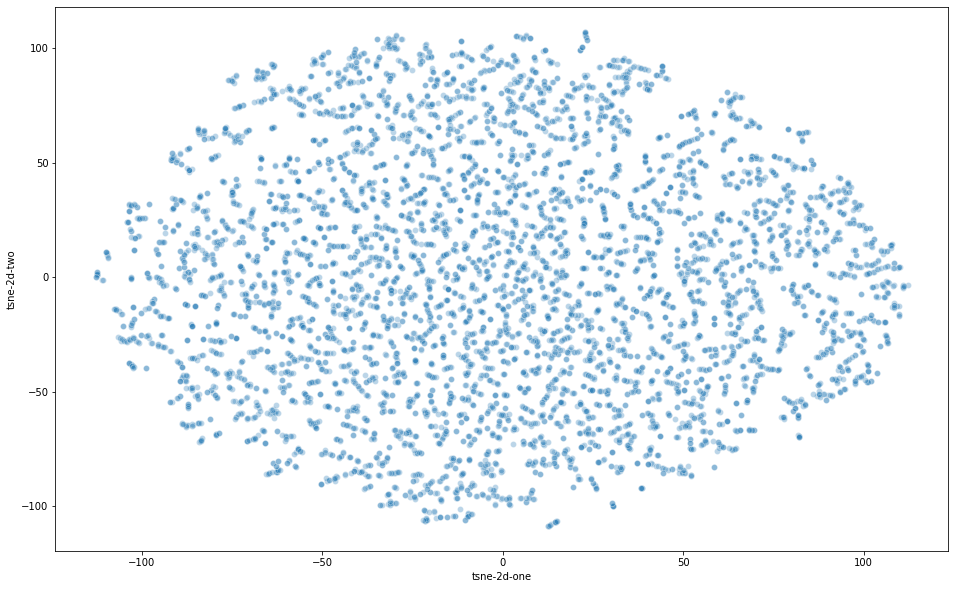

In [10]:
list_perplexity = [5, 10, 20, 30, 50]
iter_perplexity = iter(list_perplexity)

visualize_tsne_2d(df_fighter_attributes,
                  df_fighter_attributes.columns.values.tolist(),
                  next(iter_perplexity))

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7184 samples in 0.215s...
[t-SNE] Computed neighbors for 7184 samples in 1.739s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7184
[t-SNE] Computed conditional probabilities for sample 2000 / 7184
[t-SNE] Computed conditional probabilities for sample 3000 / 7184
[t-SNE] Computed conditional probabilities for sample 4000 / 7184
[t-SNE] Computed conditional probabilities for sample 5000 / 7184
[t-SNE] Computed conditional probabilities for sample 6000 / 7184
[t-SNE] Computed conditional probabilities for sample 7000 / 7184
[t-SNE] Computed conditional probabilities for sample 7184 / 7184
[t-SNE] Mean sigma: 13.857934
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.588051
[t-SNE] KL divergence after 1000 iterations: 1.484041


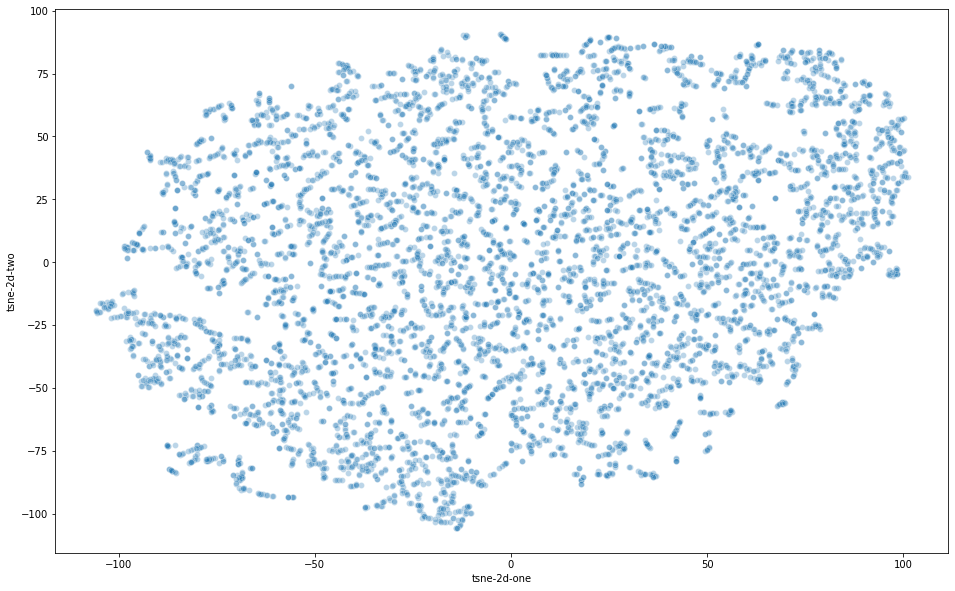

In [11]:
visualize_tsne_2d(df_fighter_attributes,
                  df_fighter_attributes.columns.values.tolist(),
                  next(iter_perplexity))

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7184 samples in 0.189s...
[t-SNE] Computed neighbors for 7184 samples in 1.872s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7184
[t-SNE] Computed conditional probabilities for sample 2000 / 7184
[t-SNE] Computed conditional probabilities for sample 3000 / 7184
[t-SNE] Computed conditional probabilities for sample 4000 / 7184
[t-SNE] Computed conditional probabilities for sample 5000 / 7184
[t-SNE] Computed conditional probabilities for sample 6000 / 7184
[t-SNE] Computed conditional probabilities for sample 7000 / 7184
[t-SNE] Computed conditional probabilities for sample 7184 / 7184
[t-SNE] Mean sigma: 15.014364
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.324738
[t-SNE] KL divergence after 1000 iterations: 1.434203


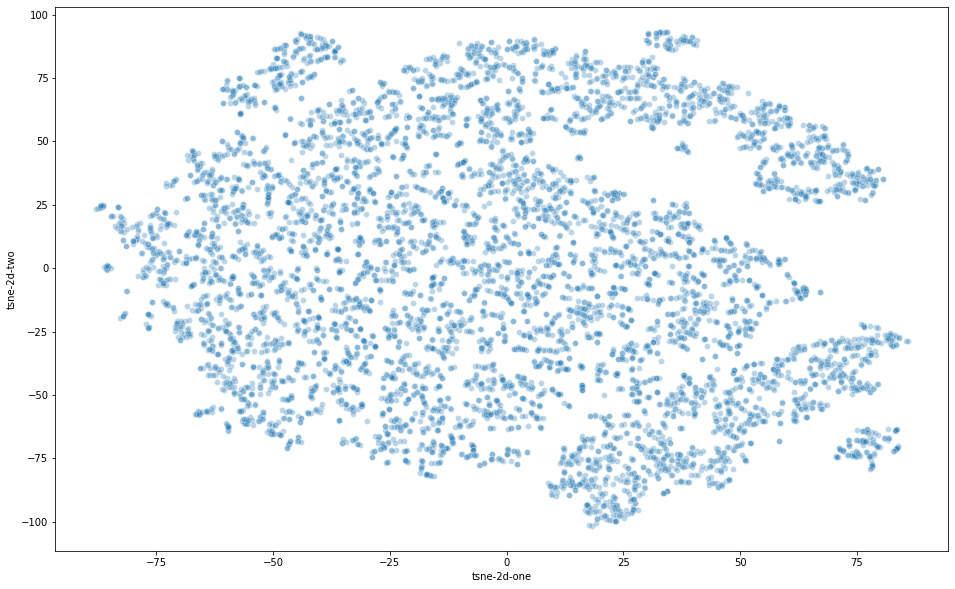

In [12]:
visualize_tsne_2d(df_fighter_attributes,
                  df_fighter_attributes.columns.values.tolist(),
                  next(iter_perplexity))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7184 samples in 0.195s...
[t-SNE] Computed neighbors for 7184 samples in 2.005s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7184
[t-SNE] Computed conditional probabilities for sample 2000 / 7184
[t-SNE] Computed conditional probabilities for sample 3000 / 7184
[t-SNE] Computed conditional probabilities for sample 4000 / 7184
[t-SNE] Computed conditional probabilities for sample 5000 / 7184
[t-SNE] Computed conditional probabilities for sample 6000 / 7184
[t-SNE] Computed conditional probabilities for sample 7000 / 7184
[t-SNE] Computed conditional probabilities for sample 7184 / 7184
[t-SNE] Mean sigma: 15.570052
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.868362
[t-SNE] KL divergence after 1000 iterations: 1.393348


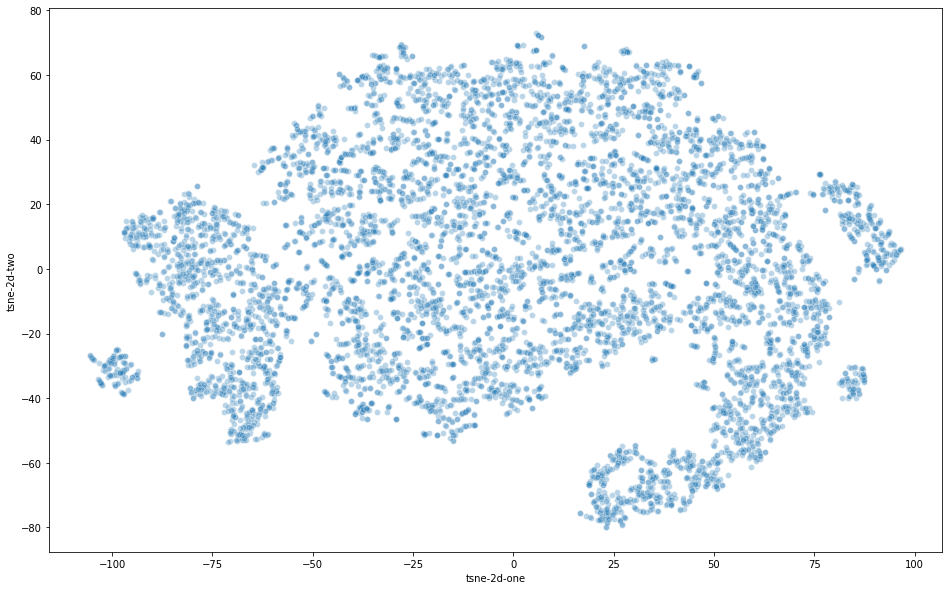

In [13]:
visualize_tsne_2d(df_fighter_attributes,
                  df_fighter_attributes.columns.values.tolist(),
                  next(iter_perplexity))

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7184 samples in 0.204s...
[t-SNE] Computed neighbors for 7184 samples in 2.432s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7184
[t-SNE] Computed conditional probabilities for sample 2000 / 7184
[t-SNE] Computed conditional probabilities for sample 3000 / 7184
[t-SNE] Computed conditional probabilities for sample 4000 / 7184
[t-SNE] Computed conditional probabilities for sample 5000 / 7184
[t-SNE] Computed conditional probabilities for sample 6000 / 7184
[t-SNE] Computed conditional probabilities for sample 7000 / 7184
[t-SNE] Computed conditional probabilities for sample 7184 / 7184
[t-SNE] Mean sigma: 16.623699
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.605606
[t-SNE] KL divergence after 1000 iterations: 1.309985


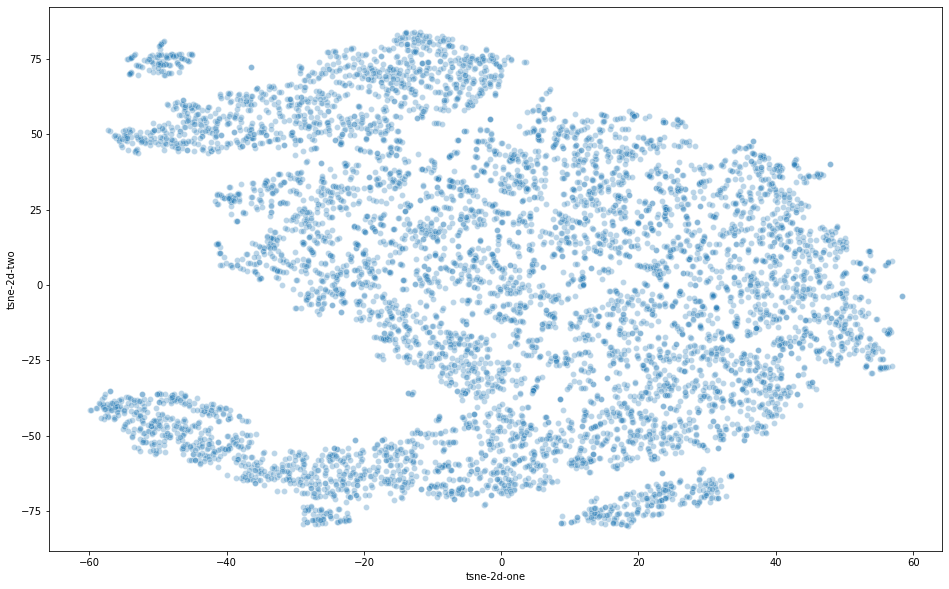

In [14]:
visualize_tsne_2d(df_fighter_attributes,
                  df_fighter_attributes.columns.values.tolist(),
                  next(iter_perplexity))